# Ejercicio: red neuronal
Programar los primeros dos escenarios del siguiente video:
https://www.youtube.com/watch?v=UNmqTiOnRfg&t=5s

In [1]:
import numpy as np
sunny=np.array([1,0])
rainy=np.array([0,1])

def comida(arreglo):
    """Dado un arreglo devuelve el string correspondiente"""
    if list(arreglo)==[1,0,0]:
        return "pie"
    elif list(arreglo)==[0,1,0]:
        return "burger"
    else:
        return "chicken"
    
def matriz(*args):
    lista=[]
    for arg in args:
        if arg=="pie":
            arg = [1,0,0]
        elif arg=="burger":
            arg = [0,1,0]
        else:
            arg = [0,0,1]
        lista.append(arg)
    m=np.array(lista)
    return m.T

## Primer escenario
Si el día es soleado, prepara pie; si es lluvioso prepara hamburguesas.
### Caso 1
Día soleado

In [2]:
res=matriz("pie","burger").dot(sunny)
comida(res)

'pie'

### Caso 2
Día lluvioso

In [3]:
res=matriz("pie","burger").dot(rainy)
comida(res)

'burger'

## Segundo escenario
Depende de lo que haya comido el día anterior. Siempre seguirá esta secuencia: pay, hamburguesa, pollo.
### Caso 1
El día anterior comió 'pay'

In [4]:
# las comidas como arreglos
p=np.array([1,0,0]) # pie
h=np.array([0,1,0]) # burguer
c=np.array([0,0,1]) # chicken
# la matriz estará en función del siguiente día
m=matriz("burger","chicken","pie")
comida(m.dot(p))

'burger'

### Caso 2
El día anterior comió 'hamburguesa'

In [5]:
comida(m.dot(h))

'chicken'

### Caso 3
El día anterior comió 'pollo'

In [6]:
comida(m.dot(c))

'pie'

# Ejercicio: decimal a romano
Convertir un número decimal (máximo hasta 999) a su correspondiente representación en romano.

In [7]:
unidades=['','I','II','III','IV','V','VI','VII','VIII','IX']
decenas=['','X','XX','XXX','XL','L','LX','LXX','LXXX','XC']
centenas=['','C','CC','CCC','CD','D','DC','DCC','DCCC','CM']
decimal=[unidades,decenas,centenas]
def convierte(digito,lista):
    return lista[int(digito)]
numero=list(input("Introduce un número: "))
res=''
for i in range(len(numero)):
    res+=convierte(numero[i],decimal[len(numero)-(i+1)])
print(res)

Introduce un número: 456
CDLVI


# Ejercicio: Medias móviles
Es un método que nos sirve para ver la tendencia de una serie de tiempo. También nos pueden ayudar para obtener el precio de una acción.

Fuente: http://progra.usm.cl/apunte/ejercicios/3/series-de-tiempo.html

[ 3.  4.  2.  1. -1.]


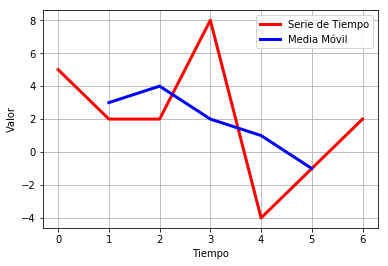

In [10]:
import numpy as np
import matplotlib.pyplot as plt

s=np.array([5,2,2,8,-4,-1,2])

def medias_moviles(arreglo,p):
    res=[]
    for i in range(len(arreglo)-p+1):
        res.append((arreglo[i]+arreglo[i+1]+arreglo[i+2])/p)
    return np.array(res)

print(medias_moviles(s,3))
# gráficas
x=np.arange(0,len(s))
plt.plot(x,s,color='red',linewidth=3,label='Serie de Tiempo')
x=np.arange(1,len(s)-1)
plt.plot(x,medias_moviles(s,3),color='blue',linewidth=3,label='Media Móvil')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio: conjetura de Collatz
Sea la siguiente operación, aplicable a cualquier número entero positivo:

- Si el número es par, se divide entre 2.
- Si el número es impar, se multiplica por 3 y se suma 1.

La conjetura es afirmar que siempre se llega al número 1.

In [ ]:
numero=int(input("Introduce un entero positivo: "))
while True:
    print(numero)
    if numero!=1:
        if numero%2==0:
            numero/=2
        else:
            numero=3*numero+1
    else:
        break

# Ejercicio: Caminata aleatoria (Movimiento Browniano)

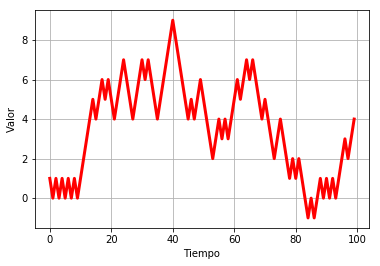

In [15]:
import numpy as np
import matplotlib.pyplot as plt

valores=np.arange(0,100)
particula=0
for i in range(100):
    particula+=np.random.choice([1,-1])
    valores[i]=particula
x=np.arange(0,100)
plt.plot(x,valores,color='red',linewidth=3)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

## Ejercicio
Suaviza la gráfica de la caminata aleatoria con la función de medias móviles.

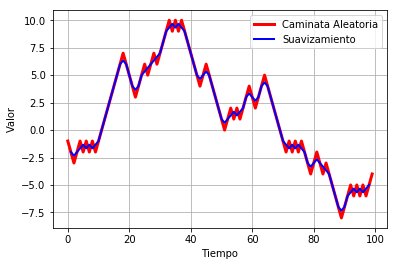

In [18]:
import numpy as np
import matplotlib.pyplot as plt

valores=np.arange(0,100)
particula=0
for i in range(100):
    particula+=np.random.choice([1,-1])
    valores[i]=particula
x=np.arange(0,100)
plt.plot(x,valores,color='red',linewidth=3,label='Caminata Aleatoria')
x=np.arange(1,len(valores)-1)
plt.plot(x,medias_moviles(valores,3),color='blue',linewidth=2,label='Suavizamiento')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio
Dado el siguiente enlace:

https://mx.investing.com/currencies/usd-mxn-historical-data

Grafica los 23 precios de Apertura del dólar y aplica un suavizamiento con el método de las medias móviles. 